## inter-strip events correction
### 数据文件：data/RIBLL2018_16C/normParas/data_16C_afterNorm.root
Branch：d1xne,d1yne,d2xne,d2yne,d3xne,d3yne: hit 结构中归一化之后的能量，能量已排序。
             其他Branch与data_16C.root文件相同

In [1]:
TFile *ipf=new TFile("data_16C_afterNorm.root");
TTree *ipt=(TTree*) ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");

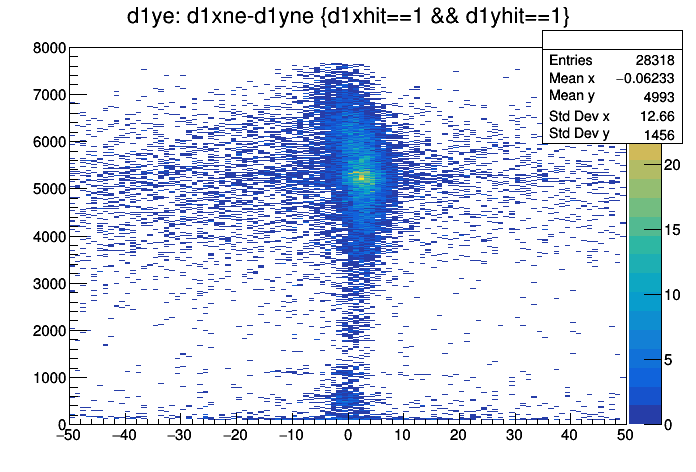

In [36]:
tree->Draw("d1ye: d1xne-d1yne>>(100,-50,50,1000,0,8000)","d1xhit==1 && d1yhit==1","colz");
c1->Draw();//d1xne-d1yne的能量差在(-15,15)范围内时，可认为有front-back correlation。
//对于大能量沉积事件，条件应适当放宽，见Scan部分说明。

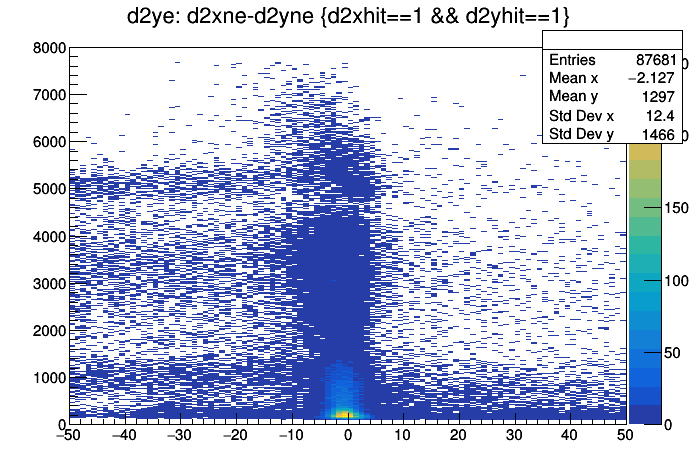

In [33]:
tree->Draw("d2ye: d2xne-d2yne>>(100,-50,50,1000,0,8000)","d2xhit==1 && d2yhit==1","colz");
c1->Draw();//d2xne-d2yne的能量差在(-15,15)范围内时，可认为有front-back correlation

### 用Scan观察DSSD hit事件结构

#### 1. d1yiht=2的事件

In [31]:
tree->Scan("d1xs:d1xne:d1ys:d1yne","d1yhit==2","",15);

***********************************************************************
*    Row   * Instance *      d1xs *     d1xne *      d1ys *     d1yne *
***********************************************************************
*        2 *        0 *        23 * 3110.3117 *        11 * 3322.9076 *
*        2 *        1 *        24 * 333.95804 *        10 * 114.01459 *
*        3 *        0 *        23 * 5401.4010 *        15 * 4512.7239 *
*        3 *        1 *           *           *        16 * 899.36799 *
*        4 *        0 *        21 * 5923.4416 *        15 * 5673.8636 *
*        4 *        1 *           *           *        14 * 267.53000 *
*        8 *        0 *        22 * 4079.7633 *         9 * 3766.7968 *
*        8 *        1 *           *           *        10 * 331.03513 *
*        9 *        0 *        13 * 6922.1099 *        12 * 6565.9612 *
*        9 *        1 *        10 * 139.53649 *        13 * 419.80013 *
*        9 *        2 *        14 * 103.07464 *           *     

Row 2: x面两条相邻，y面两条相邻，x,y相邻两条能量相加满足正背面关联关系(3110+333, 3322+114), 
可视为 粒子入射到(23,11)条能量为3443(取x方向)，一重事件。

Row 2,3,4,8,9,10,11,12,14: x面或一面各有相邻条，皆为一重事件。

<font color=Red>Row 9: 6922-(6565+419)=62, 这个事件正背面关联超出范围，但应归为相邻条事件。主要原因是当某一条沉积能量很大时，可能有两条以上的相邻条有信号，而能量沉积较低的条的信号可能被获取的pedestal cut排除掉。对于此类事件应放宽条件。</font>

In [38]:
tree->Scan("d1xs:d1xne:d1ys:d1yne","d1yhit==2&& d1yne[0]>4000","",15);//观察大能量沉积时的相邻信号

***********************************************************************
*    Row   * Instance *      d1xs *     d1xne *      d1ys *     d1yne *
***********************************************************************
*        3 *        0 *        23 * 5401.4010 *        15 * 4512.7239 *
*        3 *        1 *           *           *        16 * 899.36799 *
*        4 *        0 *        21 * 5923.4416 *        15 * 5673.8636 *
*        4 *        1 *           *           *        14 * 267.53000 *
*        9 *        0 *        13 * 6922.1099 *        12 * 6565.9612 *
*        9 *        1 *        10 * 139.53649 *        13 * 419.80013 *
*        9 *        2 *        14 * 103.07464 *           *           *
*       12 *        0 *        11 * 4345.5563 *        12 * 5304.6837 *
*       12 *        1 *        10 * 1002.2317 *        10 * 115.01009 *
***********************************************************************
==> 9 selected entries


<font color=Red>Row 4,9 与上一个Scan中的Row 9的类型相同。</font>

#### 2. d2yiht=2的事件

In [25]:
tree->Scan("d2xs:d2xne:d2ys:d2yne","d2yhit==2","",30);

***********************************************************************
*    Row   * Instance *      d2xs *     d2xne *      d2ys *     d2yne *
***********************************************************************
*        1 *        0 *        20 * 692.23013 *        21 *  693.0962 *
*        1 *        1 *         8 * 224.42518 *        28 * 222.62265 *
*        2 *        0 *        22 * 765.91432 *        12 * 896.12164 *
*        2 *        1 *        31 * 184.23649 *         8 * 182.39082 *
*        2 *        2 *        25 * 160.22889 *           *           *
*        7 *        0 *        13 * 563.67565 *        10 * 564.13259 *
*        7 *        1 *        16 * 258.26035 *         7 * 258.32820 *
*        8 *        0 *        23 * 1731.8180 *        10 * 1697.0644 *
*        8 *        1 *        22 * 301.10736 *        14 * 294.34716 *
*       12 *        0 *         9 * 1317.7696 *        18 * 1317.1071 *
*       12 *        1 *        10 * 521.06755 *        10 * 517.

Type <CR> to continue or q to quit ==> 

 Row 1: x,y方向各有两重事件，两重事件条编号不相邻，$(20,21)_s=(692,693)_e$, $(8,28)_s=(224,222)_e$ 两组正背面有很好的关联，为两重粒子入射事件
 
 Row 1,7,12,16,18,19,23,24,26,29 皆为两重事件
 
 Row2,8: 只有一个事件满足正背面关联，其他条可能为噪声，或者x,y两面的时间关系不满足符合条件。

#### 3. d2yiht=3的事件

In [26]:
tree->Scan("d2xs:d2xne:d2ys:d2yne","d2yhit==3","",30);

***********************************************************************
*    Row   * Instance *      d2xs *     d2xne *      d2ys *     d2yne *
***********************************************************************
*        3 *        0 *        21 * 891.07388 *        12 * 894.08412 *
*        3 *        1 *        27 * 371.91544 *        14 * 372.40689 *
*        3 *        2 *        19 * 203.20911 *        19 * 204.18740 *
*        4 *        0 *        13 * 447.37587 *        18 *  413.0448 *
*        4 *        1 *        24 * 376.96088 *        12 * 375.52039 *
*        4 *        2 *        25 * 303.93637 *        11 * 304.04334 *
*       11 *        0 *         7 * 1142.5339 *        15 * 1139.9838 *
*       11 *        1 *        13 * 528.04128 *         9 * 526.78459 *
*       11 *        2 *        11 * 204.49115 *         7 * 204.48850 *
*       17 *        0 *        19 * 1019.2379 *        22 * 1019.8941 *
*       17 *        1 *        26 * 442.27626 *        12 * 736.

Row 3,11,20: 为三重粒子入射事件

Row 4: 两重

Row 17,27:一重

### <font color=Blue> 根据上述讨论，可对事件进行归类，合并满足条件的相邻条事件，进行x面和y面事件匹配，并重新组织hit结构。</font>
#### <font color=Red>不满足上述关系的相邻条事件可能为两重粒子入射到相邻条引起的，这些事件还需要进行更仔细的分析</font>